In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("drug200.csv")
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [105]:
data.isnull().sum()
#there is no empty data

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [107]:
#checking for duplicates
data.duplicated().sum()

0

In [108]:
#checkig data correlation
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<AxesSubplot:xlabel='Drug', ylabel='Count'>

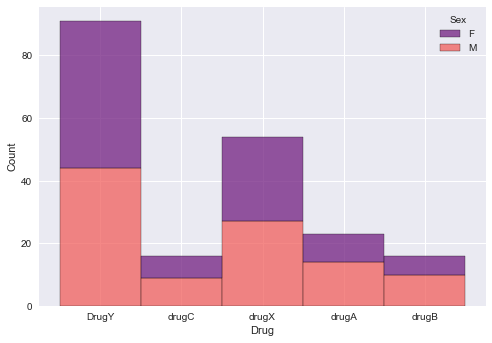

In [109]:
#Drug Distribution visualization.
sns.histplot(x = data["Drug"], hue=data["Sex"], multiple="stack",palette="magma", data=data  )

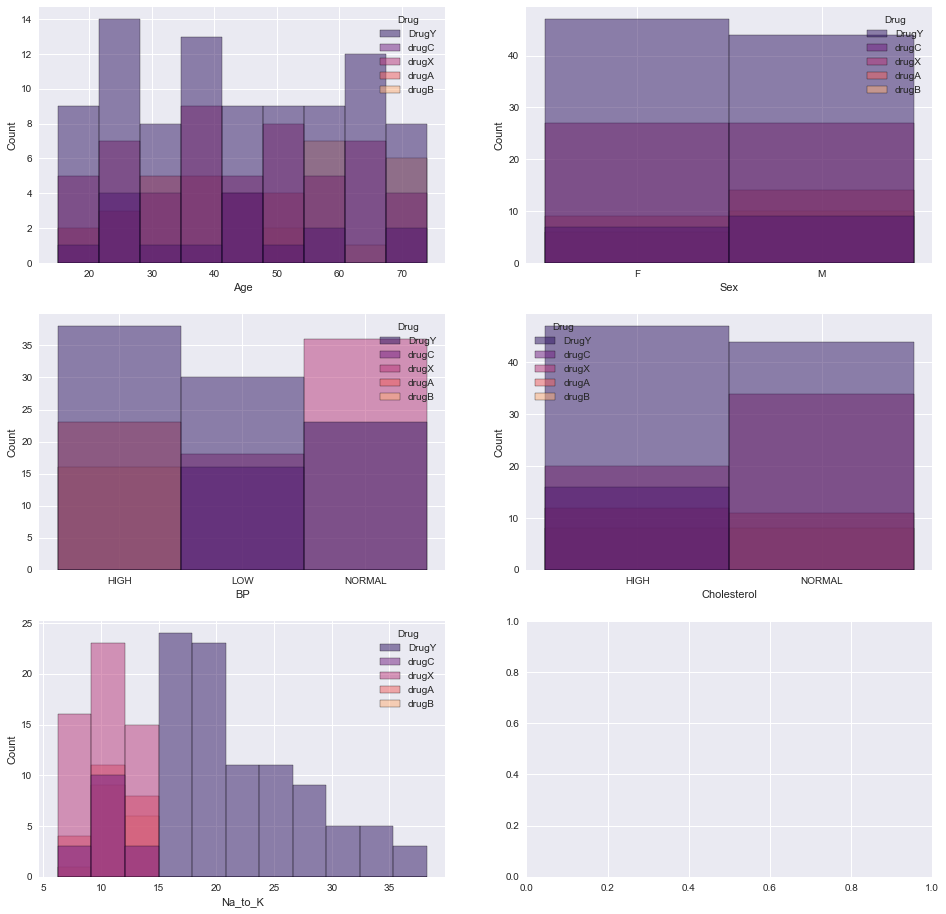

In [111]:
#Data Visualization for better understanding the data.
fig, axs = plt.subplots(3, 2, figsize=(16,16))
i=1
for feature in data.columns:
    if feature not in ["Drug"] and i < 20:
        plt.subplot(3,2,i)
        sns.histplot(data = data, x = feature, kde = False, palette = "magma", hue = 'Drug')
        i+=1

In [112]:
#Definning objective cols and encoding them using Label Encoder.

from sklearn.preprocessing import LabelEncoder 

list_str = data.select_dtypes(include = 'object').columns
list_str.drop
le = LabelEncoder()

for c in list_str:
    data[c] = le.fit_transform(data[c])

In [114]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [115]:
#splitting data

from sklearn.model_selection import train_test_split

X = data.drop("Drug", axis=1)
y = data["Drug"] 

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=43)


In [132]:
#applying algortithm
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [136]:
#checking prediction
predictions = dtc.predict(xtest)
predictions[:5]

array([2, 4, 4, 4, 2])

In [138]:
#checking accuracy

from sklearn.metrics import accuracy_score 

print(accuracy_score(ytest, predictions))

1.0
